In [1]:
from astropy.io import fits
from astropy.io.fits.hdu.hdulist import HDUList
import numpy as np
import pylab as plt
file1="./sample_data/STEREO/20100403_100815_n4c2a.fts"
file2="./sample_data/STEREO/20100403_100845_n4c2a.fts"
file3="./sample_data/STEREO/20100403_100915_n4c2a.fts"


#fits_image_filename = fits.util.get_testdata_filepath(file1)
hdul1 = fits.open(file1)
hdul2 = fits.open(file2)
hdul3 = fits.open(file3)

In [2]:
def Br(B, pB):
    """Converts unpolarized brightness,`B`, and Coronal polarized brightness,
     `pB`, into radial radiance.
    
    This function takes in two vars of `B`, Unpolarized brightness, and 
    `pB`,Coronal polarized brightness. 
    
    Parameters
    ----------
    B : np.ndarray 
    pB : np.ndarray
    
    Returns
    -------
    float
        The float that is returned is defined to be var `B_radial`.

    Notes
    ------
    Equation 1 in Deforest et al. 2022.
    """
    return (B - pB) / 2

def Bt(B, pB):
    """Converts unpolarized brightness,`B`, and Coronal polarized brightness,
     `pB`, into tangential radiance.
    
    This function takes in two vars of `B`, Unpolarized brightness, and 
    `pB`,Coronal polarized brightness. 
    
    Parameters
    ----------
    B : np.ndarrary
    pB : np.ndarrary
    
    Returns
    -------
     float
        The float that is returned is defined to be var `B_tangential`.

    Notes
    ------
    Equation 2 in Deforest et al. 2022.
    """
    return (B + pB)/2

In [3]:
class Depolarize:
    def __init__(self, datain, **kwargs):
        super().__init__(**kwargs)

        self.B = None
        self.pB = None
        print(type(datain))
        if type(datain) is dict:
            for x in datain:
                if x == "B":
                    self.B = datain[x]
                if x == "pB":
                    self.pB = datain[x]
            
    def Br(self):
        assert self.B != None, "To calculate Br (radial Brightness) unpolarized Brightness, B, is required"
        assert self.pB != None, "To calculate Br (radial Brightness) polarized Brightness, pB, is required"
        assert type(self.B) == type(self.pB), "To calculate Br (radial Brightness) polarized Brightness, pB, and unpolarized Brightness, B, should have same dimensions"
        if type(self.B) == 'numpy.ndarray':
            assert len(self.B.shape) == len(self.pB.shape), "inputs should have same dimenions"

        return Br(self.B, self.pB)

    def Bt(self):
        assert self.B != None, "To calculate Br (radial Brightness) unpolarized Brightness, B, is required"
        assert self.pB != None, "To calculate Br (radial Brightness) polarized Brightness, pB, is required"
        assert type(self.B) == type(self.pB), "To calculate Br (radial Brightness) polarized Brightness, pB, and unpolarized Brightness, B, should have same dimensions"
        if type(self.B) == 'numpy.ndarray':
            assert len(self.B.shape) == len(self.pB.shape), "inputs should have same dimenions"

        return Bt(self.B, self.pB)



In [4]:
datain = {
  "B": 2,
  "pB": 1,
}



In [5]:
def data_type(*datain):
    count=0
    for sep_datain in datain:
        print(sep_datain)
        print("c:",count)
        count=count+1
        
        
    dataout=datain

    return dataout

In [6]:
testdata = {
  "B": 2,
  "pB": 1,
}

data_type(hdul1,hdul2,hdul3)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f9a792a5a00>, <astropy.io.fits.hdu.table.TableHDU object at 0x7f9a7942e040>]
c: 0
[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f9a8917abe0>, <astropy.io.fits.hdu.table.TableHDU object at 0x7f9a7942e520>]
c: 1
[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f9a793ddb50>, <astropy.io.fits.hdu.table.TableHDU object at 0x7f9a794291f0>]
c: 2


([<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f9a792a5a00>, <astropy.io.fits.hdu.table.TableHDU object at 0x7f9a7942e040>],
 [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f9a8917abe0>, <astropy.io.fits.hdu.table.TableHDU object at 0x7f9a7942e520>],
 [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f9a793ddb50>, <astropy.io.fits.hdu.table.TableHDU object at 0x7f9a794291f0>])

In [7]:
#if type(hdul1) == <class 'astropy.io.fits.hdu.hdulist.HDUList'>:
#    print("yep")
    
if isinstance(hdul1, fits.hdu.hdulist.HDUList):
    print("yep")


yep


In [8]:
import solpolpy as sp

In [9]:
x_list =[file1,file2,file3]
x_dict ={'B':file1,'pB':file2}
x_dict_2={'B':5,'pB':6}
x_array=np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9]])

In [10]:
print(sp.core.data_constructor(x_dict_2))

<class 'dict'>
got dict
{'B': 5, 'pB': 6}


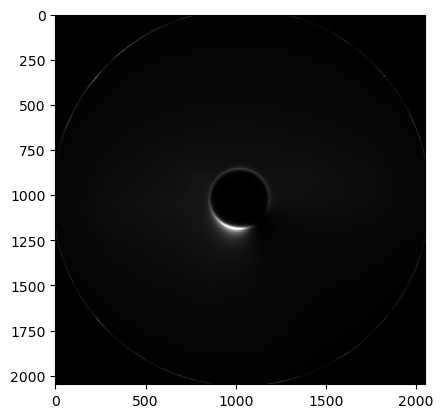

In [11]:
image_data = hdul1[0].data
image_hdr = hdul1[0].header
plt.imshow(image_data,cmap="gray")

In [12]:
hdul1[0].header

SIMPLE  =                    T / Written by IDL:  Mon Apr  5 17:11:29 2010      
BITPIX  =                   16 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                 2048 /                                                
NAXIS2  =                 2048 /                                                
EXTEND  =                    T /                                                
DATE-OBS= '2010-04-03T10:08:15.005' /                                           
FILEORIG= 'A403022W.411'       /                                                
SEB_PROG= 'NORMAL  '           /                                                
SYNC    =                    T /                                                
SPWX    =                    T /                                                
EXPCMD  =              2.00090 /                                                
EXPTIME =            6.00456